## <font color=blue>Analyzing Movie Reviews</font>
### <font color=green> We are going to analyze movie reviews from four different sites. IMDB, Fandango, Rotten Tomatoes & Metacritic are those sites. Interesting point is that Fandango not just reviews the films, but also sells the tickets online. We would see wether it's reviews are biased or not.</font>

###### Each row represents a single movie. Each column contains information about how the online moview review services RottenTomatoes, Metacritic, IMDB, and Fandango rated the movie. The dataset was put together to help detect bias in the movie review sites. Each of these sites has 2 types of score -- User scores, which aggregate user reviews, and Critic score, which aggregate professional critical reviews of the movie. Each service puts their ratings on a different scale:
 - RottenTomatoes - 0-100, in increments of 1.
 - Metacritic - 0-100, in increments of 1.
 - IMDB - 0-10, in increments of .1.
 - Fandango - 0-5, in increments of .5.

###### Typically, the primary score shown by the sites will be the Critic score. Here are descriptions of some of the relevant columns in the dataset:
 - FILM -- the name of the movie.
 - RottenTomatoes -- the RottenTomatoes (RT) critic score.
 - RottenTomatoes_User -- the RT user score.
 - Metacritic -- the Metacritic critic score.
 - Metacritic_User -- the Metacritic user score.
 - IMDB -- the IMDB score given to the movie.
 - Fandango_Stars -- the number of stars Fandango gave the movie.
###### To make it easier to compare scores across services, the columns were normalized so their scale and rounding matched the Fandango ratings. Any column with the suffix _norm is the corresponding column changed to a 0-5 scale. For example, RT_norm takes the RottenTomatoes column and turns it into a 0-5 scale from a 0-100 scale. Any column with the suffix _round is the rounded version of another column. For example, RT_user_norm_round rounds the RT_user_norm column to the nearest .5.
 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the 'fandango_score_comparison.csv" (from FiveThirtyEight.com)

movies = pd.read_csv("fandango_score_comparison.csv")
movies

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.30,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.00,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.50,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.40,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5
5,The Water Diviner (2015),63,62,50,6.8,7.2,4.5,4.0,3.15,3.10,...,3.60,3.0,3.0,2.5,3.5,3.5,34,39373,397,0.5
6,Irrational Man (2015),42,53,53,7.6,6.9,4.0,3.5,2.10,2.65,...,3.45,2.0,2.5,2.5,4.0,3.5,17,2680,252,0.5
7,Top Five (2014),86,64,81,6.8,6.5,4.0,3.5,4.30,3.20,...,3.25,4.5,3.0,4.0,3.5,3.5,124,16876,3223,0.5
8,Shaun the Sheep Movie (2015),99,82,81,8.8,7.4,4.5,4.0,4.95,4.10,...,3.70,5.0,4.0,4.0,4.5,3.5,62,12227,896,0.5
9,Love & Mercy (2015),89,87,80,8.5,7.8,4.5,4.0,4.45,4.35,...,3.90,4.5,4.5,4.0,4.5,4.0,54,5367,864,0.5


###### <font /color='green'>We now do some statistical exploration of the ratings columns. We'll primarily focus on the 'Metacritic_norm_round' and the 'Fandango_Stars' columns, which will let us see how Fandango and Metacritic differ in terms of review scores.</fond>

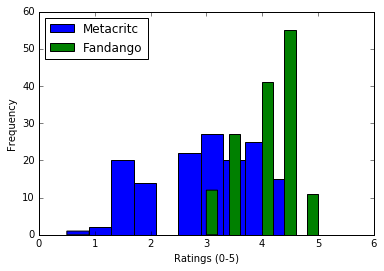

In [5]:
%matplotlib inline
_ = plt.hist(movies['Metacritic_norm_round'], color='blue', label='Metacritc')
_ = plt.hist(movies['Fandango_Stars'], color='green', label='Fandango')
_ = plt.xlabel('Ratings (0-5)')
_ = plt.ylabel('Frequency')
_ = plt.legend(loc = 'upper left')
plt.show()

##### <font /color='green'>From the above histograms we noticed some differences between the Metacritic and Fandango scores. We now apply some metrics like 'mean', 'median' & 'standard deviation' to the above ratings and try to quantify the differences among them. Again we going to apply these metrics to the columns 'Metacritic_norm_round' & 'Fandango_Stars'. </font>

In [22]:
mean_meta = movies["Metacritic_norm_round"].mean()
median_meta = movies["Metacritic_norm_round"].median()
std_dev_meta = movies["Metacritic_norm_round"].std()

mean_fan = movies["Fandango_Stars"].mean()
median_fan = movies["Fandango_Stars"].median()
std_dev_fan = movies["Fandango_Stars"].std()

print("Mean of Metacritic User Reviews: ", round(mean_meta,5))
print("Median of Metacritic User Reviews: ", round(median_meta,5))
print("Std. deviation of Metacritic User Reviews: ", round(std_dev_meta,5))

print("Mean of Fandango Reviews: ", round(mean_fan,5))
print("Median of Fandango Reviews: ", round(median_fan,5))
print("Std. deviation of Fandango Reviews: ", round(std_dev_fan,5))

Mean of Metacritic User Reviews:  2.9726
Median of Metacritic User Reviews:  3.0
Std. deviation of Metacritic User Reviews:  0.99096
Mean of Fandango Reviews:  4.08904
Median of Fandango Reviews:  4.0
Std. deviation of Fandango Reviews:  0.54039


 - 'Median' is lower than the 'Mean' of the Ratings on the Fandango i.e the Ratings are right skewed.
 
 - 'Mean' is lower than the 'Median' of the Ratings on the Metacritic i.e there are more Ratings on the lower end that effecting the 'Mean' aka left-skewed.
 
 
 - 'Std.deviation' of Metacritic is higher than that of the Fandango i.e the Ratings on Metacritic are spread wider and have high variability to comapre to that on the Fandango
 - 'Mean' of the Ratings on Fandango is higher than that of the Metacritic i.e Movies on Fandango got higher ratings compared to the Metacritic for the same movies.


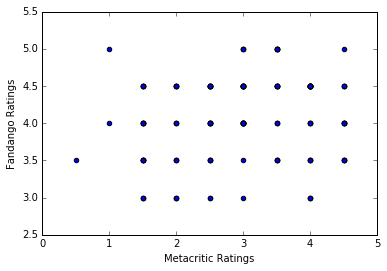

In [24]:
_ = plt.scatter(movies["Metacritic_norm_round"], movies["Fandango_Stars"])
_ = plt.xlabel("Metacritic Ratings")
_ = plt.ylabel("Fandango Ratings")
plt.show()

###### <font /color='green'> Several movies appear to have low ratings in Metacritic and high ratings in Fandango, or vice versa. We can explore this further by finding the differences between the columns.</font>

In [59]:
# difference between the "Fandango_Stars" & "Metacritic_norm_round" columns
movies["fm_diff"] = movies["Fandango_Stars"] - movies["Metacritic_norm_round"]
fm_diff = np.absolute(movies["fm_diff"])
fm_diff = fm_diff.sort_values(axis=0, ascending=False)
top5_films = fm_diff.index[0:5]
print(movies["FILM"][top5_films])


3       Do You Believe? (2015)
15              Taken 3 (2015)
134    The Longest Ride (2015)
47                Annie (2014)
19               Pixels (2015)
Name: FILM, dtype: object


 -  Let's see what the correlation coefficient between "Fandango_Stars" and "Metacritic_norm_round" is. This will help you determine if Fandango consistently has higher scores than Metacritic, or if only a few movies were assigned higher ratings.

In [65]:
from scipy import stats
Meta_Fan_rvalue = stats.pearsonr(movies["Fandango_Stars"], movies["Metacritic_norm_round"])
print("Correlation between 'Fandango_Stars' & 'Metacritic_norm_round' i.e r-value: ", Meta_Fan_rvalue[0])

Correlation between 'Fandango_Stars' & 'Metacritic_norm_round' i.e r-value:  0.178449190739


- Correlation i.e 'r-value' is fairly low that means there is not a real great correlation between them.

###### We create a linear regression with 'Metacritic_norm_round' as the x-values and 'Fandango_Stars' as the y-values.

In [67]:
slope, intercept, r_value, p_value, stderr_slope = stats.linregress(movies["Metacritic_norm_round"], movies["Fandango_Stars"]) 
print("slope: ",slope, "intercept: ", intercept, "r_value: ", r_value)

slope:  0.0973110779739 intercept:  3.7997739189 r_value:  0.178449190739


In [68]:
# we try to predict the 'Fandango' with the 'Metacritic' rating using linear regression 
pred_3 = 3 * slope + intercept # 'Metacritic' rating = 3.0
print(pred_3)

4.09170715282


###### In the last section, we created a linear regression for relating 'Metacritic_norm_round' to 'Fandango_Stars'. We can create a residual plot to better visualize how the line relates to the existing datapoints. This can help you see if two variables are linearly related or not.

In [69]:
x_dum = np.array([1.0, 5.0]) # some dummy 'Metacritic' ratings
y_pred = (x_dum * slope) + intercept  # predictions for dummy x-array
print(y_pred)

[ 3.897085    4.28632931]


- We create a scatter plot using 'Metacritic' ratings on the x-axis and 'Fandango' ratings on the y-axis

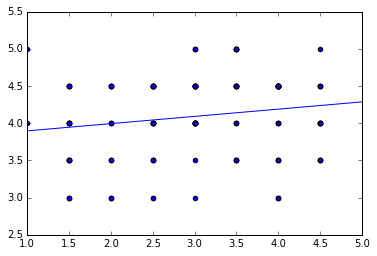

In [73]:
_ = plt.scatter(movies["Metacritic_norm_round"], movies["Fandango_Stars"])
_ = plt.plot(x_dum, y_pred)
_ = plt.xlim(1, 5)
plt.show()
                       
